**Project Title**
The Economic Impact of Natural Disasters on Local Economies

**Problem Statement**: Natural disasters, such as floods and droughts, cause significant economic disruption and financial loss. Predicting the monetary impact of these events is challenging due to the complex interaction of environmental and economic factors. By creating a predictive model, this project can help improve disaster preparedness, inform resource allocation, and strengthen economic resilience in affected regions.

**Description**: Analyzing the economic impact of disasters is a complex and often manual process. It's difficult to get a full picture of the financial damage and prepare for future events effectively. By following a structured data science pipeline, we can automate this analysis. Our project will use historical data to build a predictive model that forecasts economic loss. This can improve disaster preparedness, inform better resource allocation, and ultimately strengthen economic resilience in affected regions.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score
)

import joblib


In [16]:
df_disaster = pd.read_csv('events-US-1980-2024.csv', skiprows=2)
df_agri = pd.read_csv('BiotechCropsAllTables2024.csv', skiprows=2, header=None, encoding='latin1')

In [17]:
print(df_disaster.head())
print(df_agri.head())

                                                Name          Disaster  \
0   Southern Severe Storms and Flooding (April 1980)          Flooding   
1                      Hurricane Allen (August 1980)  Tropical Cyclone   
2  Central/Eastern Drought/Heat Wave (Summer-Fall...           Drought   
3                      Florida Freeze (January 1981)            Freeze   
4  Severe Storms, Flash Floods, Hail, Tornadoes (...      Severe Storm   

   Begin Date  End Date  CPI-Adjusted Cost  Unadjusted Cost  Deaths  
0    19800410  19800417             2756.4            706.8      30  
1    19800807  19800811             2236.2            590.0      13  
2    19800601  19801130            40681.2          10020.0    1260  
3    19810112  19810114             2076.4            572.0       0  
4    19810505  19810510             1409.1            401.4      20  
                                                   0         1     2   3  \
0  Insect-resistant (Bt) only (percent of all cor...  Illin

In [18]:
print(df_disaster.info())
print(df_disaster.describe())
print(df_disaster.isnull().sum())

print(df_agri.info())
print(df_agri.describe())
print(df_agri.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               403 non-null    object 
 1   Disaster           403 non-null    object 
 2   Begin Date         403 non-null    int64  
 3   End Date           403 non-null    int64  
 4   CPI-Adjusted Cost  403 non-null    float64
 5   Unadjusted Cost    403 non-null    float64
 6   Deaths             403 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 22.2+ KB
None
         Begin Date      End Date  CPI-Adjusted Cost  Unadjusted Cost  \
count  4.030000e+02  4.030000e+02         403.000000       403.000000   
mean   2.010085e+07  2.010103e+07        7239.718362      5111.904963   
std    1.209757e+05  1.208701e+05       18086.927893     13540.309989   
min    1.980041e+07  1.980042e+07        1063.800000       400.000000   
25%    2.002085e+07  2.002102e+

In [19]:
df_agri.columns = ['Trait', 'State', 'Year', 'Value', 'Description']

In [20]:
df_agri.head()

,Trait,State,Year,Value,Description
0,Insect-resistant (Bt) only (percent of all cor...,Illinois,2001,12,Genetically engineered (GE) corn varieties by ...
1,Insect-resistant (Bt) only (percent of all cor...,Illinois,2002,18,Genetically engineered (GE) corn varieties by ...
2,Insect-resistant (Bt) only (percent of all cor...,Illinois,2003,23,Genetically engineered (GE) corn varieties by ...
3,Insect-resistant (Bt) only (percent of all cor...,Illinois,2004,26,Genetically engineered (GE) corn varieties by ...
4,Insect-resistant (Bt) only (percent of all cor...,Illinois,2005,25,Genetically engineered (GE) corn varieties by ...


In [21]:
df_agri.columns = ['Trait', 'State', 'Year', 'Value', 'Description']
df_agri.head()

,Trait,State,Year,Value,Description
0,Insect-resistant (Bt) only (percent of all cor...,Illinois,2001,12,Genetically engineered (GE) corn varieties by ...
1,Insect-resistant (Bt) only (percent of all cor...,Illinois,2002,18,Genetically engineered (GE) corn varieties by ...
2,Insect-resistant (Bt) only (percent of all cor...,Illinois,2003,23,Genetically engineered (GE) corn varieties by ...
3,Insect-resistant (Bt) only (percent of all cor...,Illinois,2004,26,Genetically engineered (GE) corn varieties by ...
4,Insect-resistant (Bt) only (percent of all cor...,Illinois,2005,25,Genetically engineered (GE) corn varieties by ...


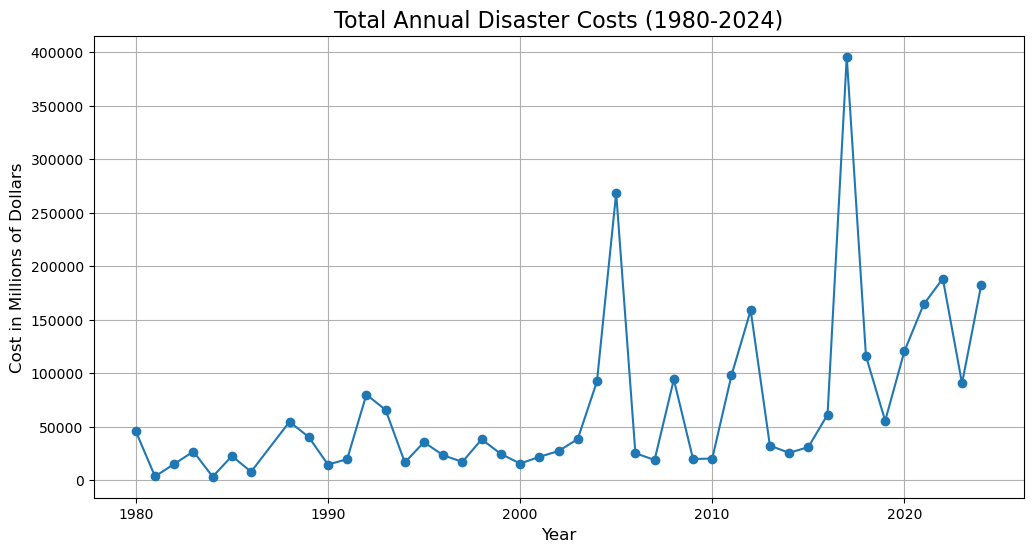

In [22]:

# convert the date to a proper format
df_disaster['Begin Date'] = pd.to_datetime(df_disaster['Begin Date'], format='%Y%m%d')
df_disaster['Year'] = df_disaster['Begin Date'].dt.year

# Now we group by year and plot the costs
yearly_costs = df_disaster.groupby('Year')['CPI-Adjusted Cost'].sum()
plt.figure(figsize=(12, 6))
yearly_costs.plot(kind='line', marker='o')
plt.title('Total Annual Disaster Costs (1980-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cost in Millions of Dollars', fontsize=12)
plt.grid(True)
plt.show()

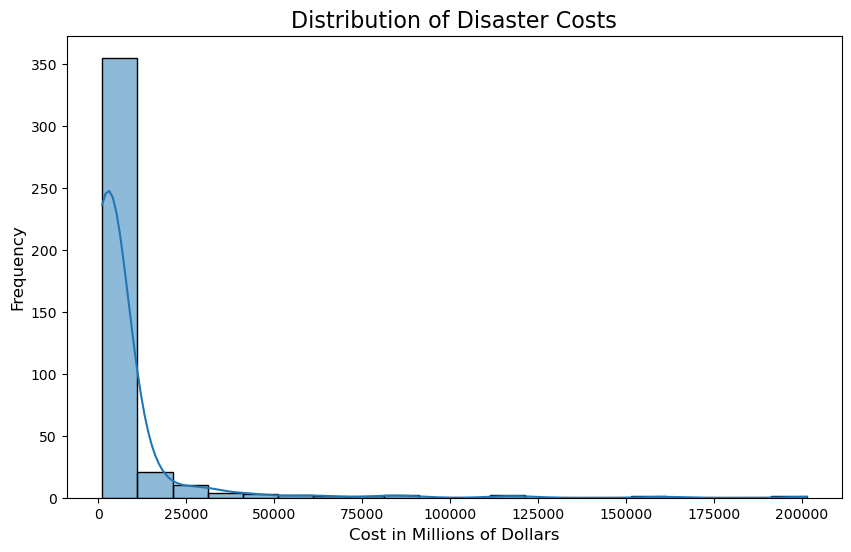

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_disaster['CPI-Adjusted Cost'], bins=20, kde=True)
plt.title('Distribution of Disaster Costs', fontsize=16)
plt.xlabel('Cost in Millions of Dollars', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\Rudra\AppData\Local\Temp\ipykernel_5492\750973900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.values, y=disaster_counts.index, palette='viridis')


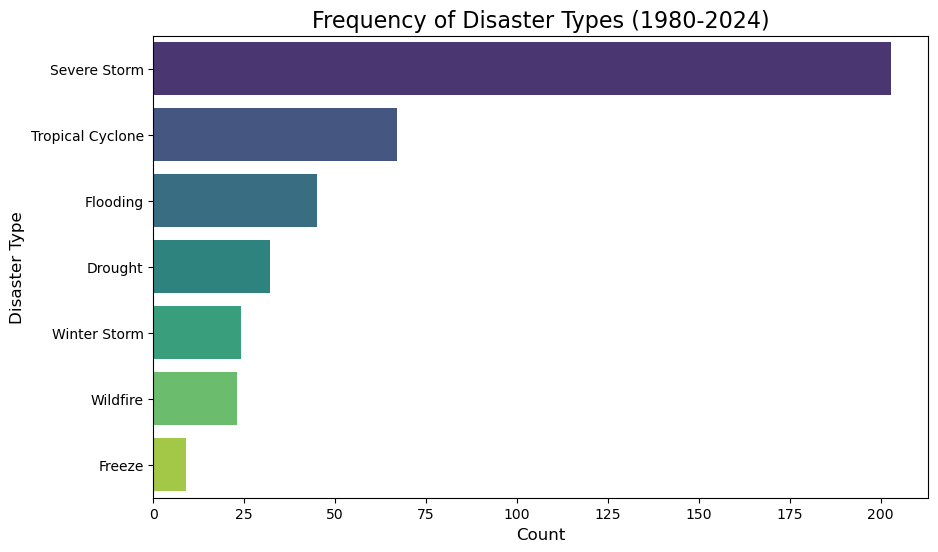

In [24]:
disaster_counts = df_disaster['Disaster'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=disaster_counts.values, y=disaster_counts.index, palette='viridis')
plt.title('Frequency of Disaster Types (1980-2024)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Disaster Type', fontsize=12)
plt.show()

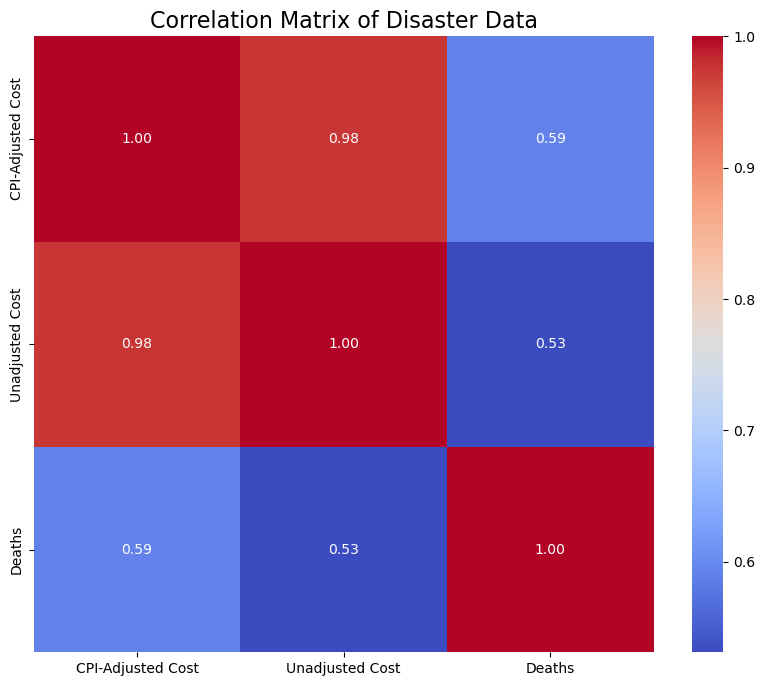

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_disaster[['CPI-Adjusted Cost', 'Unadjusted Cost', 'Deaths']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Disaster Data', fontsize=16)
plt.show()

C:\Users\Rudra\AppData\Local\Temp\ipykernel_5492\428679068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_by_disaster.values, y=avg_cost_by_disaster.index, palette='viridis')


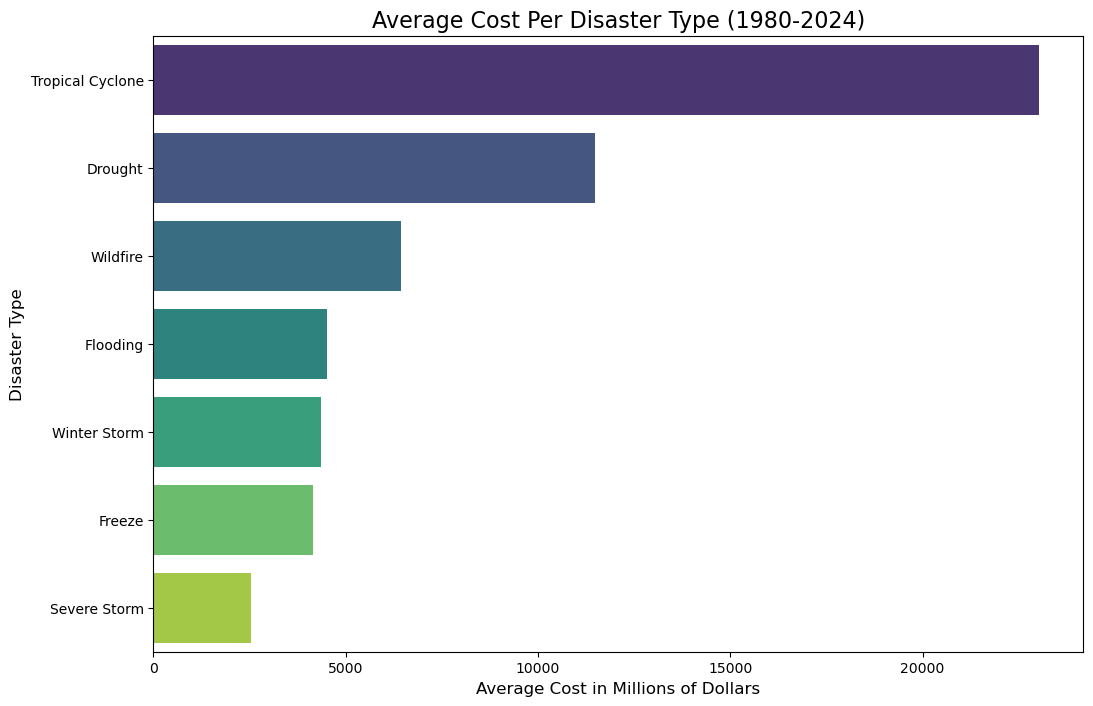

In [28]:
# Create a new cell and run this code
# Group data by disaster type and find the mean (average) cost
avg_cost_by_disaster = df_disaster.groupby('Disaster')['CPI-Adjusted Cost'].mean().sort_values(ascending=False)

# Now, create a bar chart of the average costs
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_cost_by_disaster.values, y=avg_cost_by_disaster.index, palette='viridis')
plt.title('Average Cost Per Disaster Type (1980-2024)', fontsize=16)
plt.xlabel('Average Cost in Millions of Dollars', fontsize=12)
plt.ylabel('Disaster Type', fontsize=12)
plt.show()

In [29]:
df_disaster['State'] = 'United States'
df_merged = pd.merge(df_disaster, df_agri, on=['Year', 'State'])
df_merged.head()

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,Year,State,Trait,Value,Description
0,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,20000124,1320.3,706.0,4,2000,United States,Insect-resistant (Bt) only (percent of all cor...,18,Genetically engineered (GE) corn varieties by ...
1,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,20000124,1320.3,706.0,4,2000,United States,Herbicide-tolerant (HT) only (percent of all c...,6,Genetically engineered (GE) corn varieties by ...
2,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,20000124,1320.3,706.0,4,2000,United States,Stacked gene varieties (percent of all corn pl...,1,Genetically engineered (GE) corn varieties by ...
3,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,20000124,1320.3,706.0,4,2000,United States,All GE varieties (percent of all corn planted),25,Genetically engineered (GE) corn varieties by ...
4,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,20000124,1320.3,706.0,4,2000,United States,Insect-resistant (Bt) only (percent of all upl...,15,Genetically engineered (GE) upland cotton vari...


In [30]:
df_merged['Begin Date'] = pd.to_datetime(df_merged['Begin Date'])
df_merged['End Date'] = pd.to_datetime(df_merged['End Date'])
df_merged['Duration'] = (df_merged['End Date'] - df_merged['Begin Date']).dt.days
df_merged.head()

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,Year,State,Trait,Value,Description,Duration
0,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,Insect-resistant (Bt) only (percent of all cor...,18,Genetically engineered (GE) corn varieties by ...,-10977
1,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,Herbicide-tolerant (HT) only (percent of all c...,6,Genetically engineered (GE) corn varieties by ...,-10977
2,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,Stacked gene varieties (percent of all corn pl...,1,Genetically engineered (GE) corn varieties by ...,-10977
3,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,All GE varieties (percent of all corn planted),25,Genetically engineered (GE) corn varieties by ...,-10977
4,Southeast Winter Storm (January 2000),Winter Storm,2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,Insect-resistant (Bt) only (percent of all upl...,15,Genetically engineered (GE) upland cotton vari...,-10977


In [31]:
df_prepared = pd.get_dummies(df_merged, columns=['Disaster'], drop_first=True)
df_prepared.head()

,Name,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,Year,State,Trait,Value,Description,Duration,Disaster_Flooding,Disaster_Freeze,Disaster_Severe Storm,Disaster_Tropical Cyclone,Disaster_Wildfire,Disaster_Winter Storm
0,Southeast Winter Storm (January 2000),2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,Insect-resistant (Bt) only (percent of all cor...,18,Genetically engineered (GE) corn varieties by ...,-10977,False,False,False,False,False,True
1,Southeast Winter Storm (January 2000),2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,Herbicide-tolerant (HT) only (percent of all c...,6,Genetically engineered (GE) corn varieties by ...,-10977,False,False,False,False,False,True
2,Southeast Winter Storm (January 2000),2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,Stacked gene varieties (percent of all corn pl...,1,Genetically engineered (GE) corn varieties by ...,-10977,False,False,False,False,False,True
3,Southeast Winter Storm (January 2000),2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,All GE varieties (percent of all corn planted),25,Genetically engineered (GE) corn varieties by ...,-10977,False,False,False,False,False,True
4,Southeast Winter Storm (January 2000),2000-01-21,1970-01-01 00:00:00.020000124,1320.3,706.0,4,2000,United States,Insect-resistant (Bt) only (percent of all upl...,15,Genetically engineered (GE) upland cotton vari...,-10977,False,False,False,False,False,True


In [51]:
# add cost per day and log-transformed cost
df_prepared['Cost_per_day'] = np.where(
    df_prepared['Duration'] > 0,
    df_prepared['CPI-Adjusted Cost'] / df_prepared['Duration'],
    np.nan
)
df_prepared['Log_Cost'] = np.log1p(df_prepared['CPI-Adjusted Cost'])


In [52]:
# classify cost into Low / Medium / High severity
q1, q2 = df_prepared['CPI-Adjusted Cost'].quantile([0.33, 0.66])
df_prepared['Severity'] = pd.cut(
    df_prepared['CPI-Adjusted Cost'],
    bins=[-np.inf, q1, q2, np.inf],
    labels=['Low', 'Medium', 'High']
)

In [53]:
# fill numeric with median and categorical with mode
for c in df_prepared.select_dtypes(include=['number']).columns:
    df_prepared[c] = df_prepared[c].fillna(df_prepared[c].median())
for c in df_prepared.select_dtypes(include=['object']).columns:
    if df_prepared[c].isnull().any():
        df_prepared[c] = df_prepared[c].fillna(df_prepared[c].mode()[0])


In [55]:
# scale numeric features except target cost (skip constant/NaN columns)
from sklearn.preprocessing import StandardScaler

num_cols = [
    c for c in df_prepared.select_dtypes(include=['number']).columns
    if c not in ['CPI-Adjusted Cost']
]

num_cols = [c for c in num_cols if df_prepared[c].nunique() > 1]

scaler = StandardScaler()
df_prepared[num_cols] = scaler.fit_transform(df_prepared[num_cols])


In [56]:
# define features (X) and target (y)
y = df_prepared['CPI-Adjusted Cost']
X = df_prepared.drop(columns=['CPI-Adjusted Cost', 'Unadjusted Cost', 
                              'Begin Date', 'End Date', 'Trait', 'Description'])

# keep only numeric columns
X = X.select_dtypes(include=[np.number])


In [57]:
# train-test split (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# remove constant columns (std = 0)
X_train = X_train.loc[:, X_train.std() != 0]
X_test = X_test[X_train.columns]  # keep same columns

# fill missing values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
# drop highly correlated features
import numpy as np

corr = pd.DataFrame(X_train_scaled).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.85)]

X_train_selected = pd.DataFrame(X_train_scaled).drop(columns=to_drop)
X_test_selected = pd.DataFrame(X_test_scaled).drop(columns=to_drop, errors='ignore')


In [61]:
# feature importance with RandomForest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_selected, y_train)

importances = rf.feature_importances_
feature_names = [f"Feature {i}" for i in range(X_train_selected.shape[1])]

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)
print(feat_imp.head(10))  # top 10 features


     Feature  Importance
3  Feature 3    0.995930
0  Feature 0    0.002117
1  Feature 1    0.001952
2  Feature 2    0.000000


In [63]:
# train a simple model (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# initialize and train
model = LinearRegression()
model.fit(X_train_selected, y_train)

# predictions
y_pred = model.predict(X_test_selected)

# evaluation (clean version, no warning)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.7679678989049491
RMSE: 9844.846403720785
MAE: 5936.906680763459
